![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png)
# Intro to Regression with Tensorflow & Keras

**OBJECTIVES**

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save and reuse the model

In [60]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l1, l2, l1_l2
from tensorflow.keras.callbacks import EarlyStopping

In [24]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

Load the california housing data and create a dataframe called `cali_df` below.  Make sure to add the target feature and name this `price`. 

In [25]:
cali_df = pd.DataFrame(X, columns=cali.feature_names)

In [26]:
cali_df['price'] = y
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Part 2

Create a train/test split using some of the features in your X and setting y to be the `price` column.

In [27]:
X = cali_df[['MedInc', 'HouseAge']]
y = cali_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a relu activation for the hidden layer.

In [28]:
model = Sequential()

model.add(Dense(2, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(24, activation='relu'))
model.add(Dense(1, activation='relu'))

### Part 3 - continued

Set up the compilation of the network.  Use an adam optimizer and appropriate loss function with the mean squared error metric.

In [29]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

### Part 4

Fit the model on the training data with 100 epochs (and sequester the output with `verbose = 0`). Save the fit model to the variable `history`.

In [30]:
history = model.fit(
    X_train, y_train, 
    validation_data=(X_test, y_test), 
    epochs=100,
    verbose=0
)

### Part 5

Use `matplotlib` to plot the training loss and validation loss, and the training mean squared error alongside the validation data.  Side by side subplots please.

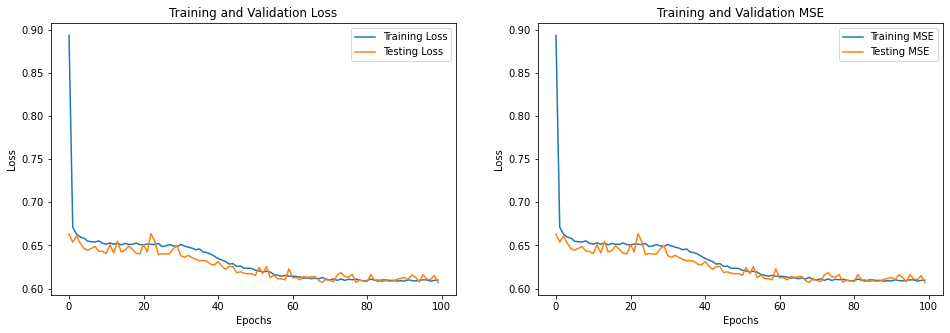

In [31]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Testing MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

### Part 6

Let's make a second network that is a bit deeper and more complex. Also, let's now use all the features and see if we help the model.  Use 3 layers, with 64, 128, and 64 nodes respectively in the hidden layers and a `relu` activation function.

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    random_state=42)

In [44]:
model = Sequential()

model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

In [45]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [46]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=100, 
                    verbose=0)

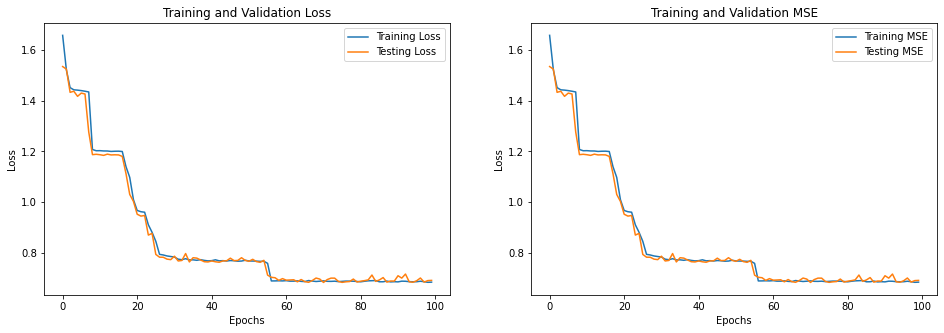

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Testing MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

### Part 7

Add a `BatchNormalization` layer prior to our first dense layer in the network above and repeat the fit.

##### Does this change anything?

In [52]:
model = Sequential()

model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

In [53]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])


In [54]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=100, 
                    verbose=0)

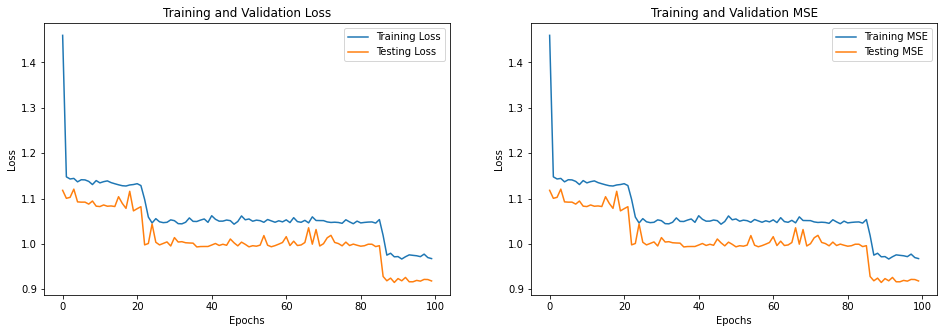

In [55]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Testing MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

The mse and loss with both the validation and training take longer to drop. The normalized model seems to take about 60 epoch

### Part 8

Early Stopping.  It seems that we may not need all 100 epochs to train the data.  Include an `EarlyStopping` callback in your model from above.  Set the `patience` equal to 5.  How many epochs do you think are appropriate?

In [61]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [62]:
model = Sequential()

model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

In [64]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [65]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=100, 
                    verbose=0, 
                    callbacks=[early_stop])

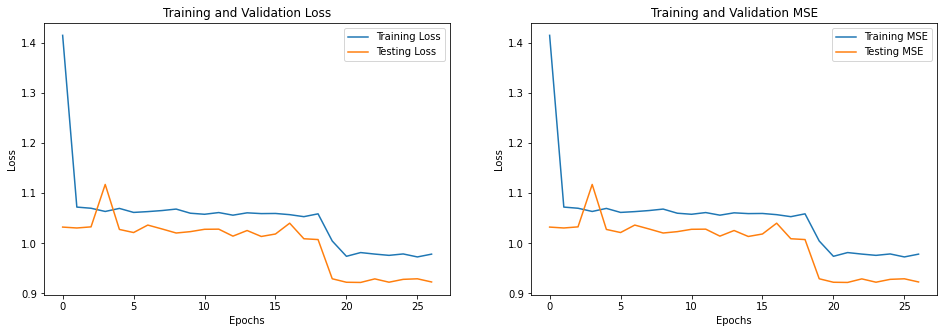

In [67]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Testing MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

### Part 9

Adding `Dropout`.  Let's add a 5% dropout to the second layer, and a 20% dropout to the third layer and see if we end up stopping sooner or performing better.

In [68]:
model = Sequential()

model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))

In [69]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [70]:
history = model.fit(X_train, y_train, 
                                    validation_data=(X_test, y_test), 
                                    epochs=100, 
                                    verbose=0, 
                                    callbacks=[early_stop])

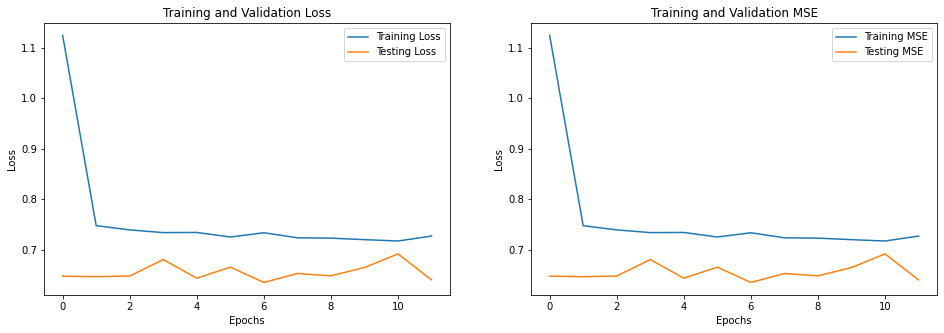

In [71]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Testing MSE')
plt.title('Training and Validation MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

### Part 9 - continued: RMSE vs. Baseline

Compare the model aboves performance to that of the baseline model for the data.

In [73]:
from sklearn.metrics import mean_squared_error

baseline_y_preds = np.full_like(y, y.mean())
mean_squared_error(y, baseline_y_preds, squared=False)

1.1539282040412253

### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  Feed a model that is identical to the one above including dropout and include `l2` regularization in each of the dense layers of 0.01.  What is the RMSE of this model?  How does it compare to the baseline?

In [74]:
model = Sequential()

model.add(BatchNormalization())
model.add(Dropout(0.05))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))

In [75]:
model.compile(optimizer='adam', loss='mse', metrics=['mse'])

In [76]:
history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    epochs=100, 
                    verbose=0, 
                    callbacks=[early_stop])


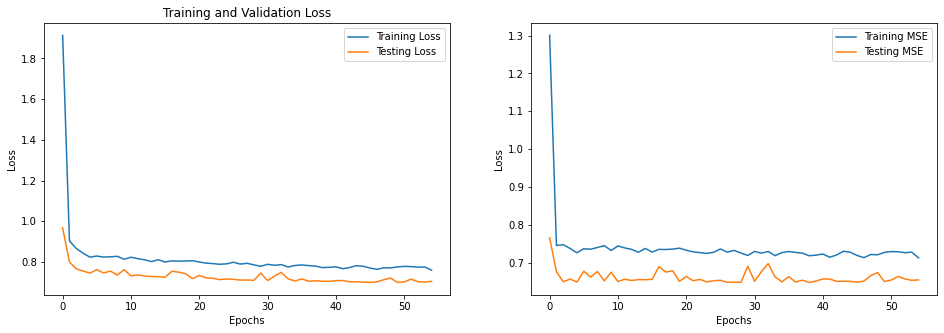

In [77]:
fig, ax = plt.subplots(1, 2, figsize=(16, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Testing Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

plt.subplot(1, 2, 2)
plt.plot(history.history['mse'], label='Training MSE')
plt.plot(history.history['val_mse'], label='Testing MSE')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

### Part 11: Saving the Model

Save the model as `cali_housing.h5`.  

In [78]:
model.save('cali_housing.h5')